In [17]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ER4_overlap = pd.read_csv("ER4_peak_overlap.bed", sep = "\t", header = None)
ER4_overlap

,0,1,2,3,4,5
0,chr19,3291946,3292436,intron,.,+
1,chr19,3292436,3292468,exon,.,+
2,chr19,3347814,3348175,intron,.,+
3,chr19,3355184,3355479,intron,.,+
4,chr19,3651300,3651599,intron,.,-
...,...,...,...,...,...,...
560,chr19,60892124,60892624,intron,.,+
561,chr19,61084417,61085032,intron,.,+
562,chr19,61084417,61085032,intron,.,-
563,chr19,61097780,61098206,intron,.,-


In [4]:
G1E_overlap = pd.read_csv("G1E_peak_overlap.bed", sep = "\t", header = None)
G1E_overlap

,0,1,2,3,4,5
0,chr19,3099982,3100278,intron,.,-
1,chr19,3291881,3292436,intron,.,+
2,chr19,3292436,3292446,exon,.,+
3,chr19,3623646,3624184,intron,.,-
4,chr19,3586511,3587013,intron,.,-
...,...,...,...,...,...,...
464,chr19,60889749,60889935,exon,.,+
465,chr19,60892134,60892563,intron,.,+
466,chr19,61084429,61084967,intron,.,+
467,chr19,61084429,61084967,intron,.,-


In [8]:
ER4_func_region = ER4_overlap[3]
ER4_intron = (ER4_func_region.values == "intron").sum()
ER4_exon = (ER4_func_region.values == "exon").sum()
ER4_promoter = (ER4_func_region.values == "promoter").sum()
print("ER4 counts for intron = " + str(ER4_intron) + " exon = " + str(ER4_exon) + " promoter = " + str(ER4_promoter))

ER4 counts for intron = 349 exon = 144 promoter = 72


In [10]:
G1E_func_region = G1E_overlap[3]
G1E_intron = (G1E_func_region.values == "intron").sum()
G1E_exon = (G1E_func_region.values == "exon").sum()
G1E_promoter = (G1E_func_region.values == "promoter").sum()
print("G1E counts for intron = " + str(G1E_intron) + " exon = " + str(G1E_exon) + " promoter = " + str(G1E_promoter))

G1E counts for intron = 301 exon = 117 promoter = 51


In [12]:
gained_df = pd.read_csv("gained.bed", sep = "\t", header = None)
lost_df = pd.read_csv("lost.bed", sep = "\t", header = None)

In [16]:
ER4_gained = gained_df[3].str.contains("ER4").sum()
ER4_lost = lost_df[3].str.contains("ER4").sum()
G1E_gained = gained_df[3].str.contains("G1E").sum()
G1E_lost = lost_df[3].str.contains("G1E").sum()

4

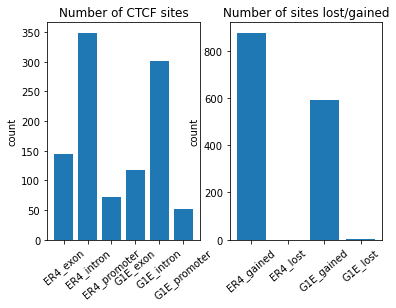

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
x1 = ["ER4_exon", "ER4_intron", "ER4_promoter", "G1E_exon", "G1E_intron", "G1E_promoter"]
y1 = [ER4_exon, ER4_intron, ER4_promoter, G1E_exon, G1E_intron, G1E_promoter]
ax1.bar(x1, y1)
ax1.set_xticks(x1)
ax1.set_xticklabels(x1, rotation = "40")
ax1.set_ylabel("count")
ax1.set_title("Number of CTCF sites")

x2 = ["ER4_gained", "ER4_lost", "G1E_gained", "G1E_lost"]
y2 = [ER4_gained, ER4_lost, G1E_gained, G1E_lost]
ax2.bar(x2, y2)
ax2.set_xticks(x2)
ax2.set_xticklabels(x2, rotation = "40")
ax2.set_ylabel("count")
ax2.set_title("Number of sites lost/gained")

plt.show()